In [60]:
!pip install missingno


In [61]:

import pandas as pd
import numpy as np
import plotly as pl
import seaborn as sns
import missingno as msno

In [62]:
df = pd.read_csv('Customer_Activity_csv.csv')

In [63]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
df = pd.read_csv('/content/Customer_Activity_csv.csv')

In [65]:
df = pd.DataFrame(df)

In [66]:
df.head(20)



,customer_id,first_name,last_name,email,active,address,district,postal_code,city,country,rental_date,return_date,amount,payment_date,rental_duration
0,1,mary,smith,mary.smith@sakilacustomer.org,1,1913 hanoi way,nagasaki,35200,sasebo,japan,2005-05-25 11:30:37,2005-06-03 12:00:37,2.99,2005-05-25 11:30:37,9
1,1,mary,smith,mary.smith@sakilacustomer.org,1,1913 hanoi way,nagasaki,35200,sasebo,japan,2005-05-28 10:35:23,2005-06-03 06:32:23,0.99,2005-05-28 10:35:23,6
2,1,mary,smith,mary.smith@sakilacustomer.org,1,1913 hanoi way,nagasaki,35200,sasebo,japan,2005-06-15 00:54:12,2005-06-23 02:42:12,5.99,2005-06-15 00:54:12,8
3,1,mary,smith,mary.smith@sakilacustomer.org,1,1913 hanoi way,nagasaki,35200,sasebo,japan,2005-06-15 18:02:53,2005-06-19 15:54:53,0.99,2005-06-15 18:02:53,4
4,1,mary,smith,mary.smith@sakilacustomer.org,1,1913 hanoi way,nagasaki,35200,sasebo,japan,2005-06-15 21:08:46,2005-06-25 02:26:46,9.99,2005-06-15 21:08:46,10
5,1,mary,smith,mary.smith@sakilacustomer.org,1,1913 hanoi way,nagasaki,35200,sasebo,japan,2005-06-16 15:18:57,2005-06-17 21:05:57,4.99,2005-06-16 15:18:57,1
6,1,mary,smith,mary.smith@sakilacustomer.org,1,1913 hanoi way,nagasaki,35200,sasebo,japan,2005-06-18 08:41:48,2005-06-22 03:36:48,4.99,2005-06-18 08:41:48,4
7,1,mary,smith,mary.smith@sakilacustomer.org,1,1913 hanoi way,nagasaki,35200,sasebo,japan,2005-06-18 13:33:59,2005-06-19 17:40:59,0.99,2005-06-18 13:33:59,1
8,1,mary,smith,mary.smith@sakilacustomer.org,1,1913 hanoi way,nagasaki,35200,sasebo,japan,2005-06-21 06:24:45,2005-06-28 03:28:45,3.99,2005-06-21 06:24:45,7
9,1,mary,smith,mary.smith@sakilacustomer.org,1,1913 hanoi way,nagasaki,35200,sasebo,japan,2005-07-08 03:17:05,2005-07-14 01:19:05,5.99,2005-07-08 03:17:05,6


In [ ]:
df.shape

(1000, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1000 non-null   int64  
 1   first_name       1000 non-null   object 
 2   last_name        1000 non-null   object 
 3   email            1000 non-null   object 
 4   active           1000 non-null   int64  
 5   address          1000 non-null   object 
 6   district         966 non-null    object 
 7   postal_code      1000 non-null   int64  
 8   city             1000 non-null   object 
 9   country          1000 non-null   object 
 10  rental_date      1000 non-null   object 
 11  return_date      1000 non-null   object 
 12  amount           1000 non-null   float64
 13  payment_date     1000 non-null   object 
 14  rental_duration  1000 non-null   int64  
dtypes: float64(1), int64(4), object(10)
memory usage: 117.3+ KB


In [ ]:
df. count()

,0
customer_id,1000
first_name,1000
last_name,1000
email,1000
active,1000
address,1000
district,966
postal_code,1000
city,1000
country,1000


In [ ]:
df.describe()

,customer_id,active,postal_code,amount,rental_duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,18.706000,0.972000,50623.087000,4.152000,4.987000
std,10.497131,0.165055,26459.555567,2.406563,2.622157
min,1.000000,0.000000,1027.000000,0.990000,0.000000
25%,9.000000,1.000000,34021.000000,2.990000,3.000000
50%,19.000000,1.000000,49521.000000,3.990000,5.000000
75%,28.000000,1.000000,72192.000000,4.990000,7.000000
max,37.000000,1.000000,99865.000000,11.990000,10.000000


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isna().sum().sort_values(ascending=False)

,0
district,34
first_name,0
customer_id,0
last_name,0
email,0
active,0
address,0
postal_code,0
city,0
country,0


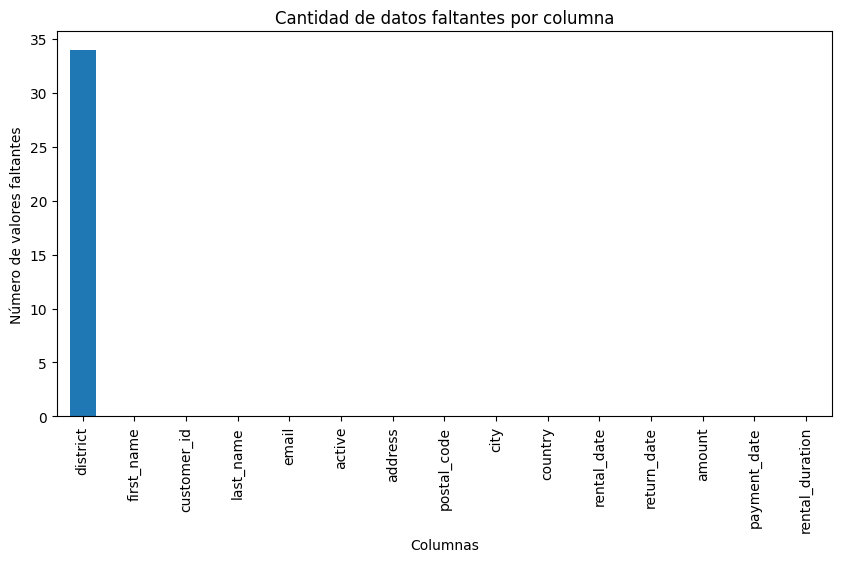

In [ ]:

import matplotlib.pyplot as plt

missing = df.isna().sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
missing.plot(kind='bar')
plt.title("Cantidad de datos faltantes por columna")
plt.ylabel("Número de valores faltantes")
plt.xlabel("Columnas")
plt.show()

In [ ]:
missing_pct = (df.isna().mean()*100).sort_values(ascending=False)
print(missing_pct)

district           3.437816
customer_id        0.000000
first_name         0.000000
email              0.000000
last_name          0.000000
active             0.000000
address            0.000000
postal_code        0.000000
city               0.000000
country            0.000000
rental_date        0.000000
return_date        0.000000
amount             0.000000
payment_date       0.000000
rental_duration    0.000000
is_active          0.000000
rental_month       0.000000
dtype: float64


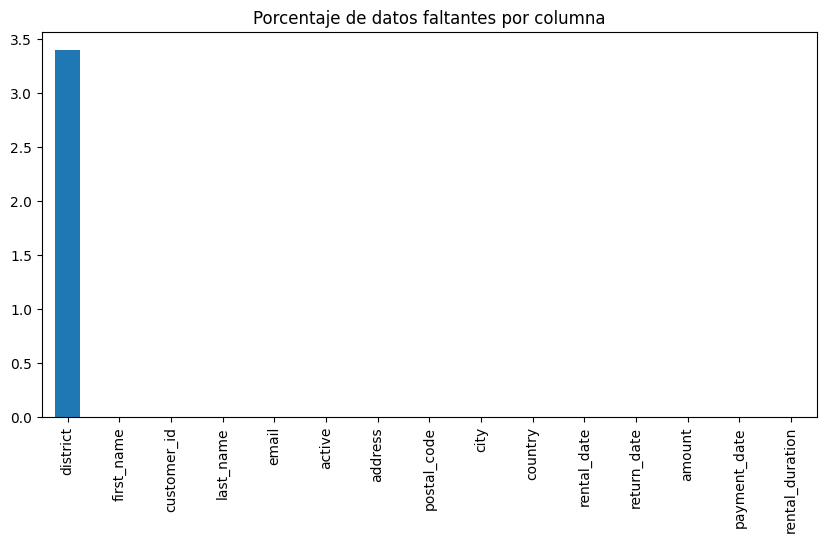

In [ ]:
missing_pct = (df.isna().mean () *100).sort_values(ascending=False)
plt.figure(figsize=(10,5))
missing_pct.plot(kind='bar')
plt.title('Porcentaje de datos faltantes por columna')
plt.show()

<Axes: >

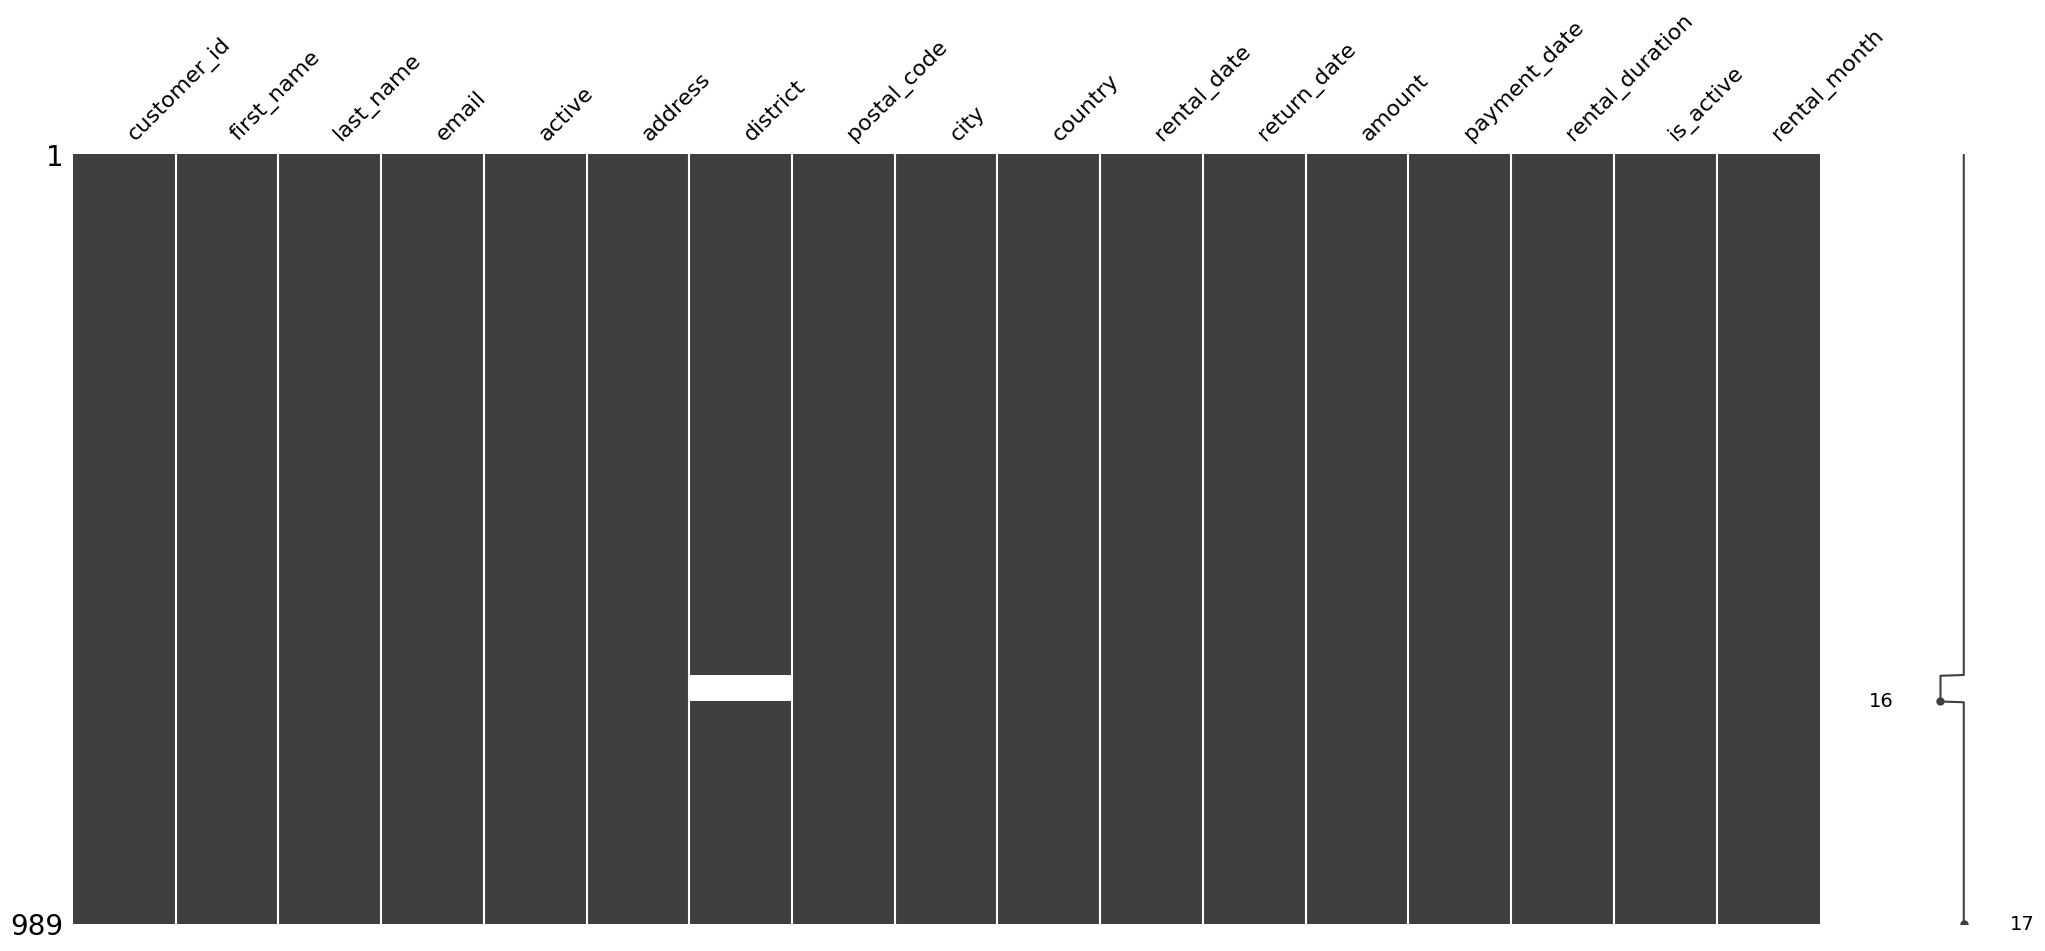

In [ ]:
msno.matrix(df)

<Axes: >

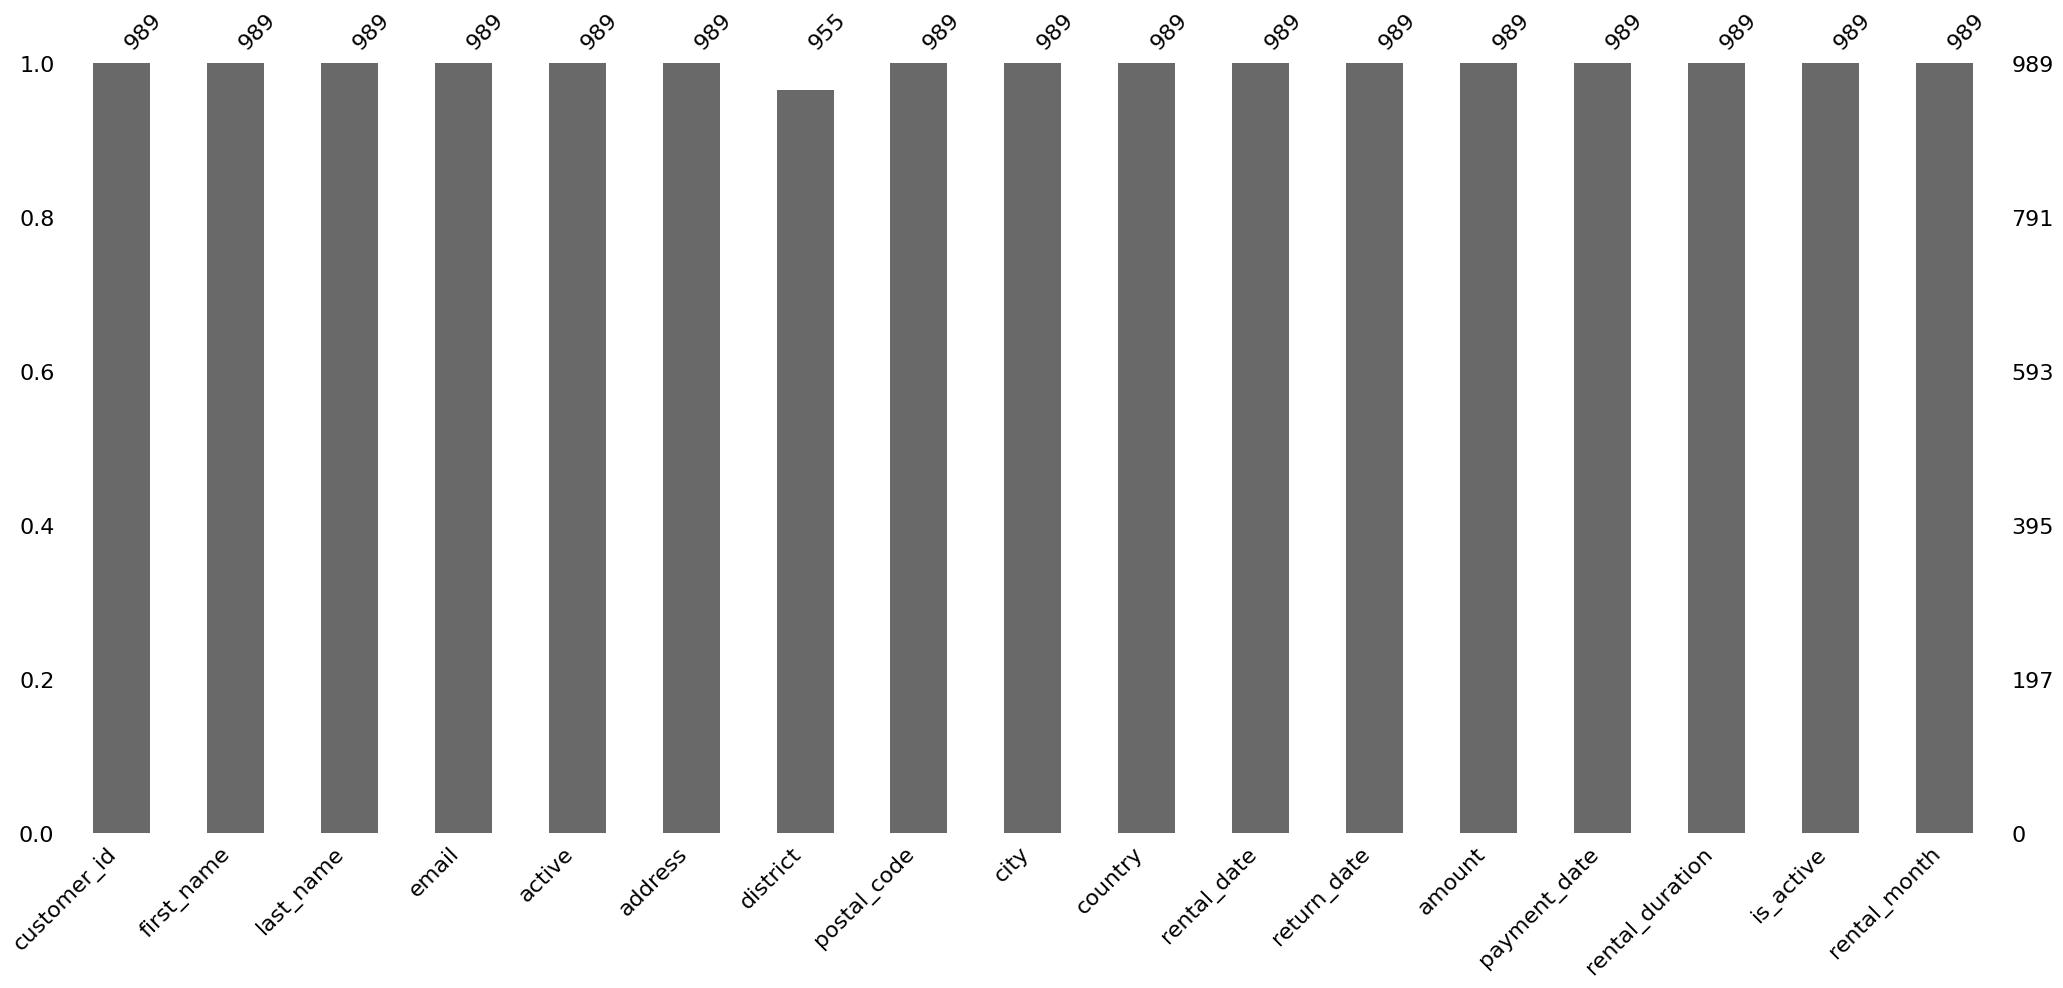

In [ ]:
msno.bar(df)

In [74]:
Customer_Activity_csv_df = df.copy()

In [77]:

cols_to_drop = ['country_code','tags','partner_id','borrower_genders','date', 'funded_time', 'region', 'use']
for col in cols_to_drop:
    if col in Customer_Activity_csv_df.columns:
        Customer_Activity_csv_df = Customer_Activity_csv_df.drop(columns=col)

In [78]:
Customer_Activity_csv_df.shape

(1000, 15)

In [81]:
Customer_Activity_csv_df['rental_date'] = pd.to_datetime(Customer_Activity_csv_df['rental_date'], errors='coerce')
Customer_Activity_csv_df['return_date'] = pd.to_datetime(Customer_Activity_csv_df['return_date'], errors='coerce')
Customer_Activity_csv_df['payment_date'] = pd.to_datetime(Customer_Activity_csv_df['payment_date'], errors='coerce')

# Normalize dates to midnight
Customer_Activity_csv_df['rental_date'] = Customer_Activity_csv_df['rental_date'].dt.normalize()
Customer_Activity_csv_df['return_date'] = Customer_Activity_csv_df['return_date'].dt.normalize()
Customer_Activity_csv_df['payment_date'] = Customer_Activity_csv_df['payment_date'].dt.normalize()

In [83]:
Customer_Activity_csv_df.head(3)

,customer_id,first_name,last_name,email,active,address,district,postal_code,city,country,rental_date,return_date,amount,payment_date,rental_duration
0,1,mary,smith,mary.smith@sakilacustomer.org,1,1913 hanoi way,nagasaki,35200,sasebo,japan,2005-05-25,2005-06-03,2.99,2005-05-25,9
1,1,mary,smith,mary.smith@sakilacustomer.org,1,1913 hanoi way,nagasaki,35200,sasebo,japan,2005-05-28,2005-06-03,0.99,2005-05-28,6
2,1,mary,smith,mary.smith@sakilacustomer.org,1,1913 hanoi way,nagasaki,35200,sasebo,japan,2005-06-15,2005-06-23,5.99,2005-06-15,8


In [84]:
for col in Customer_Activity_csv_df.columns:
    if Customer_Activity_csv_df[col].dtype == 'object':
        Customer_Activity_csv_df[col] = Customer_Activity_csv_df[col].astype('string')

In [85]:
Customer_Activity_csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id      1000 non-null   int64         
 1   first_name       1000 non-null   string        
 2   last_name        1000 non-null   string        
 3   email            1000 non-null   string        
 4   active           1000 non-null   int64         
 5   address          1000 non-null   string        
 6   district         966 non-null    string        
 7   postal_code      1000 non-null   int64         
 8   city             1000 non-null   string        
 9   country          1000 non-null   string        
 10  rental_date      1000 non-null   datetime64[ns]
 11  return_date      1000 non-null   datetime64[ns]
 12  amount           1000 non-null   float64       
 13  payment_date     1000 non-null   datetime64[ns]
 14  rental_duration  1000 non-null   int64   

In [86]:
def clean_text(s):
  return s.astype(str).str.strip().str.lower()

  for col in Customer_Activity_csv_df.columns:
    if Customer_Activity_csv_df[col].dtype == 'object':
      Customer_Activity_csv_df[col] = clean_text(Customer_Activity_csv_df[col])


In [89]:
 Customer_Activity_csv_df["district"] = np.where(
     Customer_Activity_csv_df["last_name"] <  Customer_Activity_csv_df["country"],
     "rental_date",
     "return_date"
     )

In [90]:
Customer_Activity_csv_df.head()

,customer_id,first_name,last_name,email,active,address,district,postal_code,city,country,rental_date,return_date,amount,payment_date,rental_duration
0,1,mary,smith,mary.smith@sakilacustomer.org,1,1913 hanoi way,return_date,35200,sasebo,japan,2005-05-25,2005-06-03,2.99,2005-05-25,9
1,1,mary,smith,mary.smith@sakilacustomer.org,1,1913 hanoi way,return_date,35200,sasebo,japan,2005-05-28,2005-06-03,0.99,2005-05-28,6
2,1,mary,smith,mary.smith@sakilacustomer.org,1,1913 hanoi way,return_date,35200,sasebo,japan,2005-06-15,2005-06-23,5.99,2005-06-15,8
3,1,mary,smith,mary.smith@sakilacustomer.org,1,1913 hanoi way,return_date,35200,sasebo,japan,2005-06-15,2005-06-19,0.99,2005-06-15,4
4,1,mary,smith,mary.smith@sakilacustomer.org,1,1913 hanoi way,return_date,35200,sasebo,japan,2005-06-15,2005-06-25,9.99,2005-06-15,10


In [92]:
post_disbursed_loans = Customer_Activity_csv_df[Customer_Activity_csv_df["district"] ==  "return_date"]

In [94]:
min_val = Customer_Activity_csv_df['amount'].min()
max_val = Customer_Activity_csv_df['amount'].max()

bins = [
    min_val,
    3, # Adjusted bin to create more meaningful categories
    5, # Adjusted bin
    10, # Adjusted bin
    max_val
]

labels = ['micro', 'small', 'medium', 'large']

Customer_Activity_csv_df['amount_category'] = pd.cut(Customer_Activity_csv_df['amount'], bins=bins, labels=labels, right=False)

# Print value counts to verify the new categories
print(Customer_Activity_csv_df['amount_category'].value_counts())

amount_category
micro     485
small     267
medium    241
large       6
Name: count, dtype: int64


In [95]:
Customer_Activity_csv_df.shape

(1000, 16)

In [96]:
Customer_Activity_csv_df.head()

,customer_id,first_name,last_name,email,active,address,district,postal_code,city,country,rental_date,return_date,amount,payment_date,rental_duration,amount_category
0,1,mary,smith,mary.smith@sakilacustomer.org,1,1913 hanoi way,return_date,35200,sasebo,japan,2005-05-25,2005-06-03,2.99,2005-05-25,9,micro
1,1,mary,smith,mary.smith@sakilacustomer.org,1,1913 hanoi way,return_date,35200,sasebo,japan,2005-05-28,2005-06-03,0.99,2005-05-28,6,micro
2,1,mary,smith,mary.smith@sakilacustomer.org,1,1913 hanoi way,return_date,35200,sasebo,japan,2005-06-15,2005-06-23,5.99,2005-06-15,8,medium
3,1,mary,smith,mary.smith@sakilacustomer.org,1,1913 hanoi way,return_date,35200,sasebo,japan,2005-06-15,2005-06-19,0.99,2005-06-15,4,micro
4,1,mary,smith,mary.smith@sakilacustomer.org,1,1913 hanoi way,return_date,35200,sasebo,japan,2005-06-15,2005-06-25,9.99,2005-06-15,10,medium


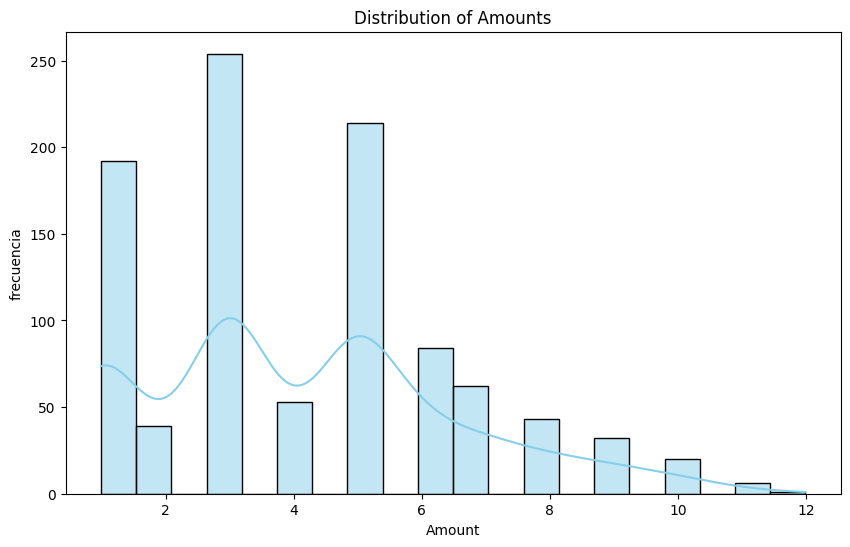

In [98]:
plt.figure(figsize=(10, 6))
sns.histplot(Customer_Activity_csv_df['amount'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Amounts')
plt.xlabel('Amount')
plt.ylabel ('frecuencia')
plt.show()

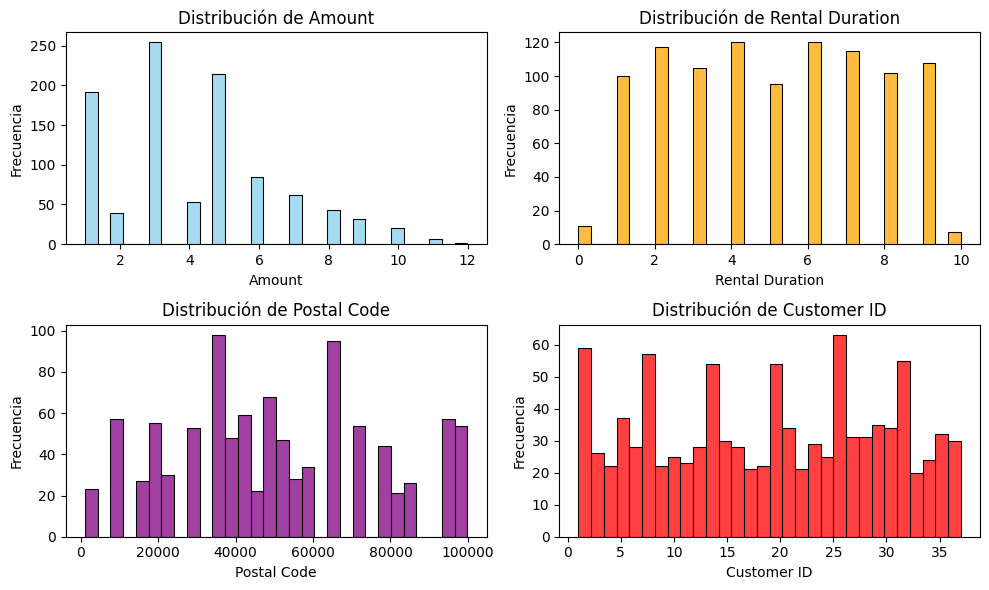

In [102]:
flig, ax = plt.subplots(2,2, figsize=(10, 6))
axes = ax.flatten()

sns.histplot(df['amount'], bins=30, kde=False, color='skyblue',ax=axes[0])
axes[0].set_title('Distribución de Amount')
axes[0].set_xlabel('Amount')
axes[0].set_ylabel('Frecuencia')

sns.histplot(df['rental_duration'], bins=30, kde=False, color='orange',ax=axes[1])
axes[1].set_title('Distribución de Rental Duration')
axes[1].set_xlabel('Rental Duration')
axes[1].set_ylabel('Frecuencia')

sns.histplot(df['postal_code'], bins=30, kde=False, color='purple',ax=axes[2])
axes[2].set_title('Distribución de Postal Code')
axes[2].set_xlabel('Postal Code')
axes[2].set_ylabel('Frecuencia')

sns.histplot(df['customer_id'], bins=30, kde=False, color='red',ax=axes[3])
axes[3].set_title('Distribución de Customer ID')
axes[3].set_xlabel('Customer ID')
axes[3].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Index(['india', 'japan', 'united states', 'taiwan', 'pakistan', 'iran',
       'bangladesh', 'holy see (vatican city state)', 'yugoslavia', 'greece'],
      dtype='string', name='country')
[575.56 453.86 335.18 267.29 231.41 192.48 152.66 152.66 151.67 135.74]


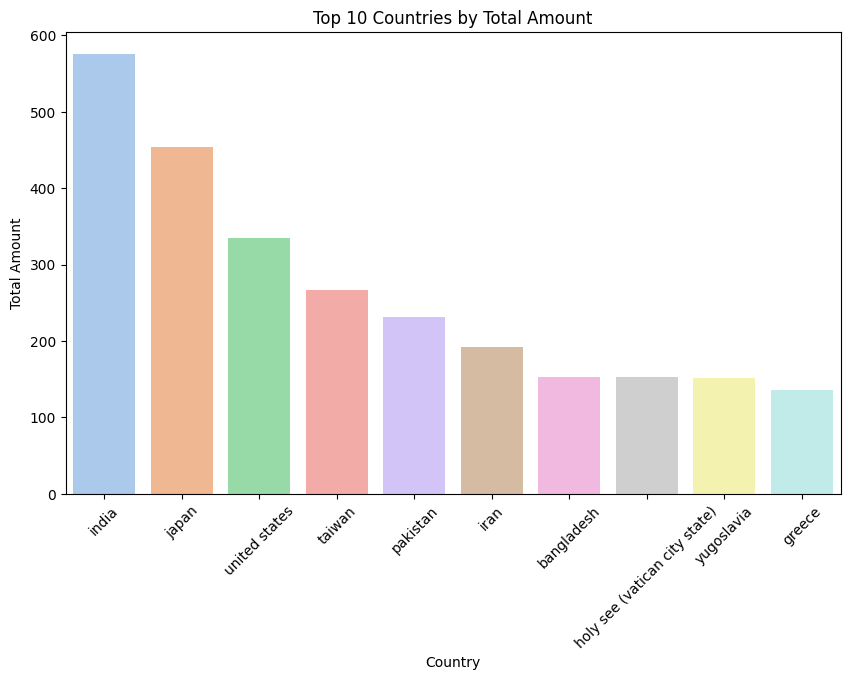

In [104]:
country_totals = Customer_Activity_csv_df.groupby('country')['amount'].sum().sort_values(ascending=False).head(10)

print(country_totals.index)
print(country_totals.values)

plt.figure(figsize=(10, 6))
sns.barplot(x=country_totals.index, y=country_totals.values, palette='pastel', hue=country_totals.index, legend=False)
plt.title('Top 10 Countries by Total Amount')
plt.xlabel('Country')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

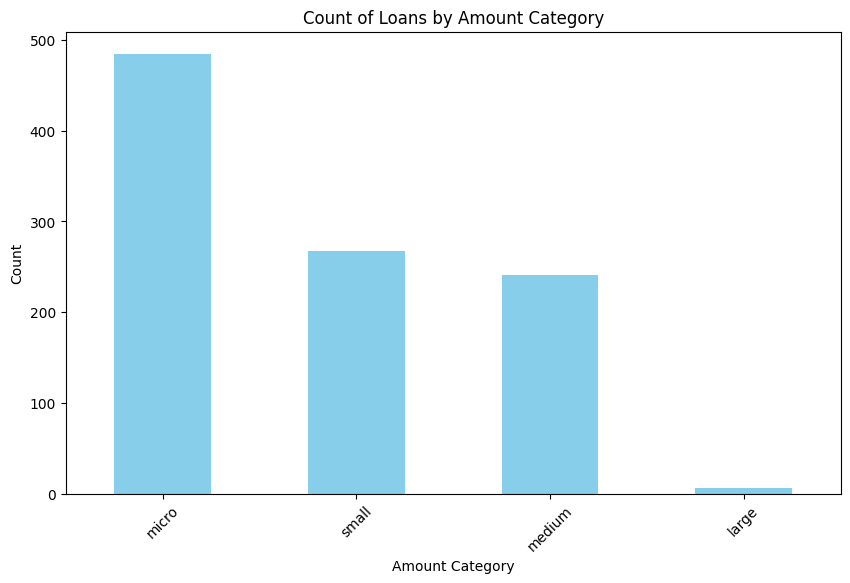

In [106]:
count_by_category = Customer_Activity_csv_df['amount_category'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
count_by_category.plot(kind='bar', color='skyblue')
plt.title('Count of Loans by Amount Category')
plt.xlabel('Amount Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

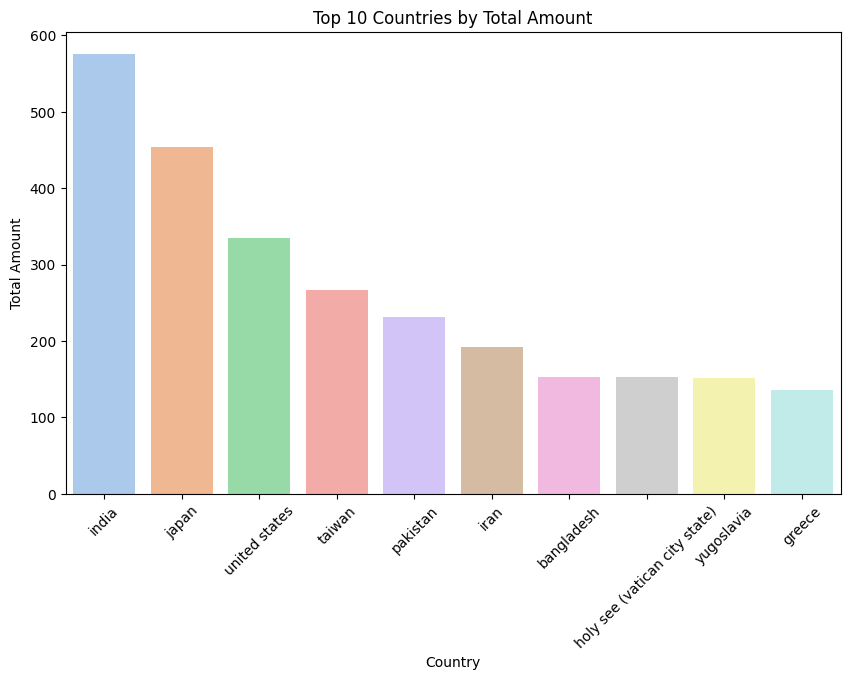

In [109]:
agg = Customer_Activity_csv_df.groupby('country')['amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=agg.index, y=agg.values, palette='pastel', hue=agg.index, legend=False)
plt.title('Top 10 Countries by Total Amount')
plt.xlabel('Country')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

In [111]:
Customer_Activity_csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id      1000 non-null   int64         
 1   first_name       1000 non-null   string        
 2   last_name        1000 non-null   string        
 3   email            1000 non-null   string        
 4   active           1000 non-null   int64         
 5   address          1000 non-null   string        
 6   district         1000 non-null   object        
 7   postal_code      1000 non-null   int64         
 8   city             1000 non-null   string        
 9   country          1000 non-null   string        
 10  rental_date      1000 non-null   datetime64[ns]
 11  return_date      1000 non-null   datetime64[ns]
 12  amount           1000 non-null   float64       
 13  payment_date     1000 non-null   datetime64[ns]
 14  rental_duration  1000 non-null   int64   

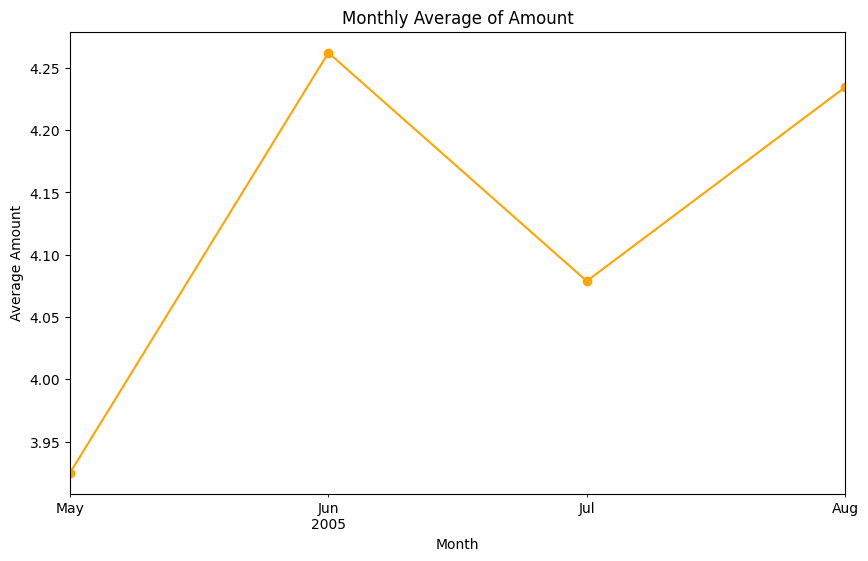

In [113]:
Customer_Activity_csv_df['rental_month'] = Customer_Activity_csv_df['rental_date'].dt.to_period('M')
monthly_avg = Customer_Activity_csv_df.groupby('rental_month')['amount'].mean()

plt.figure(figsize=(10, 6))
monthly_avg.plot(marker='o', color='orange')
plt.title('Monthly Average of Amount')
plt.xlabel('Month')
plt.ylabel('Average Amount')
plt.xticks(rotation=45)
plt.show()

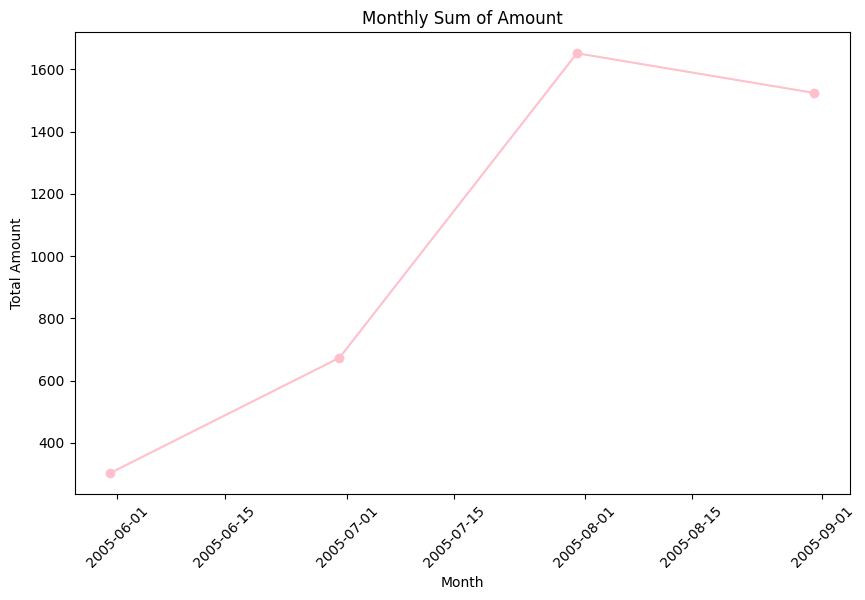

In [117]:
Customer_Activity_csv_df_line = Customer_Activity_csv_df.groupby(pd.Grouper(key= 'rental_date', freq='ME')).agg({'amount': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(Customer_Activity_csv_df_line['rental_date'], Customer_Activity_csv_df_line['amount'], marker='o', color='pink')
plt.title('Monthly Sum of Amount')
plt.xlabel('Month')
plt.ylabel ('Total Amount')
plt.xticks(rotation=45)
plt.show()

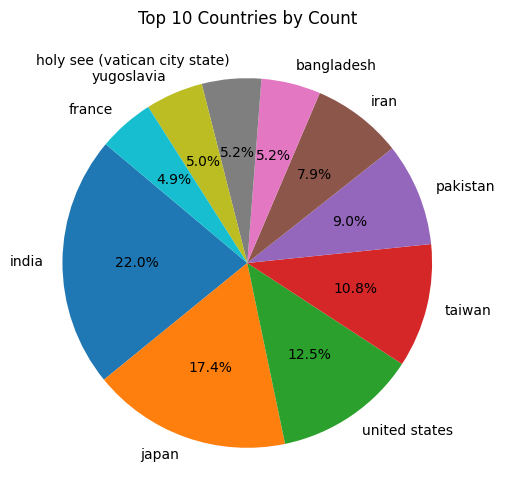

In [118]:
top_countries = Customer_Activity_csv_df['country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Countries by Count')
plt.show()

In [119]:
!pip install geodatasets

In [120]:
import geopandas as gpd
import geodatasets
import os
import requests
import zipfile

In [122]:
pd.set_option('display.max_columns', None)
